#Autoencoders: Generating Fashion & Numbers from MNIST datasets
- Comprises of encoder & decoder
- Learns latent representations of data
- Used because it learns without supervision
  - Good for dimentionality reduction and extrapolating from incomplete/unbalanced data
  - There's a lot of unbalanced data in AI, so Autoencoders are really useful!

# MNIST Fashion dataset

In [ ]:
# Importing necessary packages
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Building the autoencoder
tf.random.set_seed(42)

encoder = tf.keras.Sequential([tf.keras.layers.Dense(2)])
decoder = tf.keras.Sequential([tf.keras.layers.Dense(3)])
autoencoder = tf.keras.Sequential([encoder, decoder])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)
autoencoder.compile(loss='mse', optimizer=optimizer)

In [ ]:
# Load Fashion MNIST dataset
fashion = tf.keras.datasets.fashion_mnist.load_data()

# Splitting and scaling the dataset
(X_train_full, y_train_full), (X_test, y_test) = fashion

X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255 # Why 255??

X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

4422102/4422102 [==============================] - 0s 0us/step


##Stacked Autoencoder

In [ ]:
# Stacked Autoencoder
tf.random.set_seed(42) # Ensures reproducability on CPU

stacked_encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu')
])

stacked_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(28 * 28),
    tf.keras.layers.Reshape([28, 28])
])

stacked_ae = tf.keras.Sequential([stacked_encoder, stacked_decoder])

# Compiling the Autoencoder
stacked_ae.compile(loss='mse', optimizer='nadam')
history = stacked_ae.fit(X_train, X_train, epochs=20, validation_data=(X_valid, X_valid))

Epoch 1/20
1719/1719 [==============================] - 12s 6ms/step - loss: 0.0234 - val_loss: 0.0184
Epoch 2/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0173 - val_loss: 0.0169
Epoch 3/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0164 - val_loss: 0.0161
Epoch 4/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0158 - val_loss: 0.0157
Epoch 5/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0154 - val_loss: 0.0154
Epoch 6/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0151 - val_loss: 0.0151
Epoch 7/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0150 - val_loss: 0.0150
Epoch 8/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0148 - val_loss: 0.0151
Epoch 9/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0147 - val_loss: 0.0148
Epoch 10/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0

In [ ]:
# Copied code from the book: plots original and reconstructed images from au
def plot_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = np.clip(model.predict(images[:n_images]), 0, 1)
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plt.imshow(images[image_index], cmap="binary")
        plt.axis("off")
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plt.imshow(reconstructions[image_index], cmap="binary")
        plt.axis("off")

1/1 [==============================] - 0s 73ms/step


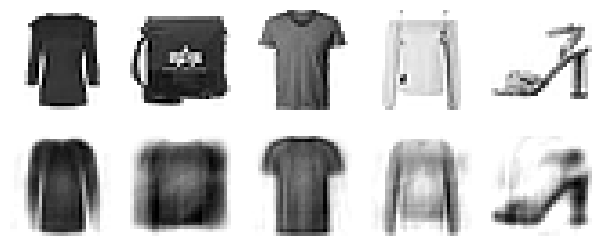

In [ ]:
# Reconstructing a few images to show what the stacked ae does
plot_reconstructions(stacked_ae)
plt.show()

##Convolutional Autoencoder

In [ ]:
# Convolutional Autoencoder
tf.random.set_seed(42)

# Encoder
conv_encoder = tf.keras.Sequential([
    tf.keras.layers.Reshape([28, 28, 1]),
    tf.keras.layers.Conv2D(16, 3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),  # output: 14 × 14 x 16
    tf.keras.layers.Conv2D(32, 3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),  # output: 7 × 7 x 32
    tf.keras.layers.Conv2D(64, 3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),  # output: 3 × 3 x 64
    tf.keras.layers.Conv2D(30, 3, padding="same", activation="relu"),
    tf.keras.layers.GlobalAvgPool2D()  # output: 30
])

# Decoder
conv_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(3 * 3 * 16),
    tf.keras.layers.Reshape((3, 3, 16)),
    tf.keras.layers.Conv2DTranspose(32, 3, strides=2, activation="relu"),
    tf.keras.layers.Conv2DTranspose(16, 3, strides=2, padding="same",
                                    activation="relu"),
    tf.keras.layers.Conv2DTranspose(1, 3, strides=2, padding="same"),
    tf.keras.layers.Reshape([28, 28])
])

# Constructing the convolutional autoencoder
conv_ae = tf.keras.Sequential([conv_encoder, conv_decoder])

# Compiles and fits the model
conv_ae.compile(loss="mse", optimizer="nadam")
history = conv_ae.fit(X_train, X_train, epochs=10,
                      validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 36s 20ms/step - loss: 0.0294 - val_loss: 0.0205
Epoch 2/10
1719/1719 [==============================] - 38s 22ms/step - loss: 0.0186 - val_loss: 0.0173
Epoch 3/10
1719/1719 [==============================] - 35s 21ms/step - loss: 0.0165 - val_loss: 0.0158
Epoch 4/10
1719/1719 [==============================] - 35s 21ms/step - loss: 0.0152 - val_loss: 0.0152
Epoch 5/10
1719/1719 [==============================] - 38s 22ms/step - loss: 0.0144 - val_loss: 0.0141
Epoch 6/10
1719/1719 [==============================] - 33s 19ms/step - loss: 0.0138 - val_loss: 0.0136
Epoch 7/10
1719/1719 [==============================] - 33s 19ms/step - loss: 0.0133 - val_loss: 0.0132
Epoch 8/10
1719/1719 [==============================] - 36s 21ms/step - loss: 0.0129 - val_loss: 0.0142
Epoch 9/10
1719/1719 [==============================] - 37s 21ms/step - loss: 0.0126 - val_loss: 0.0126
Epoch 10/10
1719/1719 [==============================] - 34s 20m

1/1 [==============================] - 0s 130ms/step


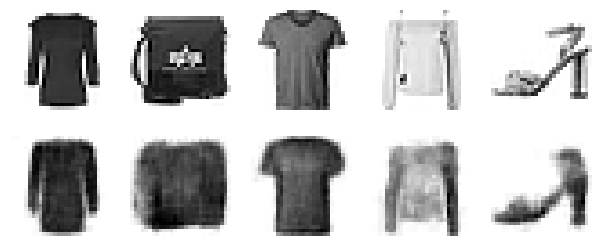

In [ ]:
plot_reconstructions(conv_ae)
plt.show()

##Recurrent Autoencoder

In [ ]:
# Recurrent Autoencoders
tf.random.set_seed(42)

recurrent_encoder = tf.keras.Sequential([
    tf.keras.layers.LSTM(100, return_sequences=True),
    tf.keras.layers.LSTM(30)
])

recurrent_decoder = tf.keras.Sequential([
    tf.keras.layers.RepeatVector(28),
    tf.keras.layers.LSTM(100, return_sequences=True),
    tf.keras.layers.Dense(28)
])

recurrent_ae = tf.keras.Sequential([recurrent_encoder, recurrent_decoder])
recurrent_ae.compile(loss='mse', optimizer='nadam')

history = recurrent_ae.fit(X_train, X_train, epochs = 10, validation_data = (X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 70s 37ms/step - loss: 0.0265 - val_loss: 0.0192
Epoch 2/10
1719/1719 [==============================] - 62s 36ms/step - loss: 0.0177 - val_loss: 0.0162
Epoch 3/10
1719/1719 [==============================] - 59s 35ms/step - loss: 0.0155 - val_loss: 0.0160
Epoch 4/10
1719/1719 [==============================] - 64s 38ms/step - loss: 0.0141 - val_loss: 0.0136
Epoch 5/10
1719/1719 [==============================] - 62s 36ms/step - loss: 0.0131 - val_loss: 0.0127
Epoch 6/10
1719/1719 [==============================] - 62s 36ms/step - loss: 0.0124 - val_loss: 0.0121
Epoch 7/10
1719/1719 [==============================] - 59s 34ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 8/10
1719/1719 [==============================] - 59s 34ms/step - loss: 0.0114 - val_loss: 0.0113
Epoch 9/10
1719/1719 [==============================] - 58s 34ms/step - loss: 0.0110 - val_loss: 0.0118
Epoch 10/10
1719/1719 [==============================] - 58s 34m

1/1 [==============================] - 1s 843ms/step


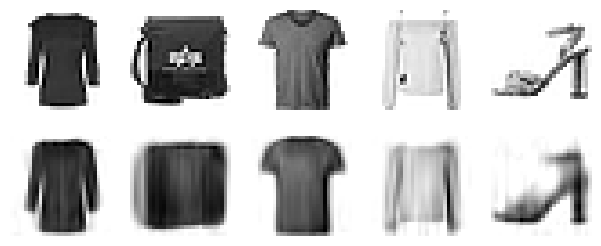

In [ ]:
plot_reconstructions(recurrent_ae)
plt.show()

#Autoencoders: MNIST Digits Classification
`keras.datasets.mnist.load_data(path="mnist.npz")`


[source](https://keras.io/api/datasets/mnist/)

In [ ]:
# Load Digits MNIST dataset
digits = tf.keras.datasets.mnist.load_data(path='mnist.npz')

# Splitting and scaling the dataset
(X_train_full2, y_train_full2), (X_test2, y_test2) = digits

X_train_full2 = X_train_full2.astype(np.float32) / 255
X_test2 = X_test2.astype(np.float32) / 255 # Why 255??

X_train2, X_valid2 = X_train_full2[:-5000], X_train_full2[-5000:]
y_train2, y_valid2 = y_train_full2[:-5000], y_train_full2[-5000:]

In [ ]:
# Copied code from the book: plots original and reconstructed images from au
def plot_reconstructions2(model, images=X_valid2, n_images=5):
    reconstructions = np.clip(model.predict(images[:n_images]), 0, 1)
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plt.imshow(images[image_index], cmap="binary")
        plt.axis("off")
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plt.imshow(reconstructions[image_index], cmap="binary")
        plt.axis("off")

##Stacked Autoencoder

In [ ]:
# Stacked autoencoder
tf.random.set_seed(42) # Ensures reproducability on CPU

stacked_encoder2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu')
])

stacked_decoder2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(28 * 28),
    tf.keras.layers.Reshape([28, 28])
])

stacked_ae2 = tf.keras.Sequential([stacked_encoder2, stacked_decoder2])

# Compiling the Autoencoder
stacked_ae2.compile(loss='mse', optimizer='nadam')

# Numbers Stacked Autoencoder
sae_history = stacked_ae2.fit(X_train2, X_train2, epochs=20, validation_data=(X_valid2, X_valid2))

Epoch 1/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0304 - val_loss: 0.0249
Epoch 2/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0236 - val_loss: 0.0221
Epoch 3/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0215 - val_loss: 0.0208
Epoch 4/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0204 - val_loss: 0.0200
Epoch 5/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0198 - val_loss: 0.0194
Epoch 6/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0193 - val_loss: 0.0190
Epoch 7/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0190 - val_loss: 0.0188
Epoch 8/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0187 - val_loss: 0.0184
Epoch 9/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0184 - val_loss: 0.0182
Epoch 10/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.018

1/1 [==============================] - 0s 15ms/step


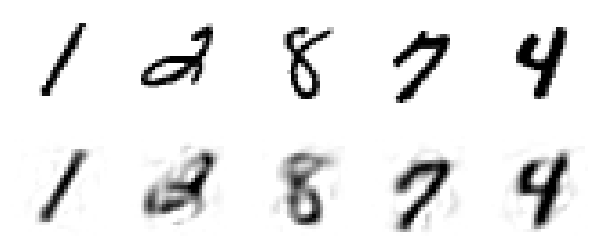

In [ ]:
plot_reconstructions2(stacked_ae2)
plt.show()

##Convolutional autoencoder

In [ ]:
# Convolutional autoencoder
tf.random.set_seed(42)

# Encoder
conv_encoder2 = tf.keras.Sequential([
    tf.keras.layers.Reshape([28, 28, 1]),
    tf.keras.layers.Conv2D(16, 3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),  # output: 14 × 14 x 16
    tf.keras.layers.Conv2D(32, 3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),  # output: 7 × 7 x 32
    tf.keras.layers.Conv2D(64, 3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),  # output: 3 × 3 x 64
    tf.keras.layers.Conv2D(30, 3, padding="same", activation="relu"),
    tf.keras.layers.GlobalAvgPool2D()  # output: 30
])

# Decoder
conv_decoder2 = tf.keras.Sequential([
    tf.keras.layers.Dense(3 * 3 * 16),
    tf.keras.layers.Reshape((3, 3, 16)),
    tf.keras.layers.Conv2DTranspose(32, 3, strides=2, activation="relu"),
    tf.keras.layers.Conv2DTranspose(16, 3, strides=2, padding="same",
                                    activation="relu"),
    tf.keras.layers.Conv2DTranspose(1, 3, strides=2, padding="same"),
    tf.keras.layers.Reshape([28, 28])
])

# Constructing the convolutional autoencoder
conv_ae2 = tf.keras.Sequential([conv_encoder2, conv_decoder2])

# Compiles and fits the model
conv_ae2.compile(loss="mse", optimizer="nadam")

# Numbers Convolutional Autoencoder
cae_history = conv_ae2.fit(X_train2, X_train2, epochs=10,
                      validation_data=(X_valid2, X_valid2))

Epoch 1/10
1719/1719 [==============================] - 42s 23ms/step - loss: 0.0305 - val_loss: 0.0187
Epoch 2/10
1719/1719 [==============================] - 33s 19ms/step - loss: 0.0160 - val_loss: 0.0141
Epoch 3/10
1719/1719 [==============================] - 34s 20ms/step - loss: 0.0130 - val_loss: 0.0126
Epoch 4/10
1719/1719 [==============================] - 33s 19ms/step - loss: 0.0113 - val_loss: 0.0110
Epoch 5/10
1719/1719 [==============================] - 33s 19ms/step - loss: 0.0102 - val_loss: 0.0100
Epoch 6/10
1719/1719 [==============================] - 33s 19ms/step - loss: 0.0095 - val_loss: 0.0094
Epoch 7/10
1719/1719 [==============================] - 33s 19ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 8/10
1719/1719 [==============================] - 33s 19ms/step - loss: 0.0085 - val_loss: 0.0085
Epoch 9/10
1719/1719 [==============================] - 33s 19ms/step - loss: 0.0082 - val_loss: 0.0082
Epoch 10/10
1719/1719 [==============================] - 33s 19m

1/1 [==============================] - 0s 176ms/step


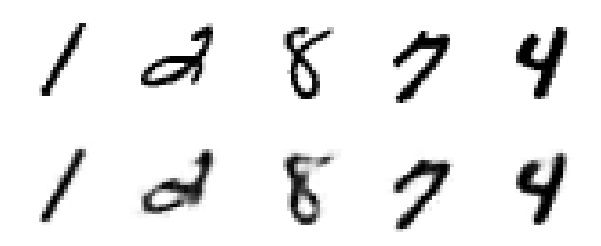

In [ ]:
plot_reconstructions2(conv_ae2)
plt.show()

##Recurrent Autoencoder

In [ ]:
# Recurrent autoencoder
tf.random.set_seed(42)

recurrent_encoder2 = tf.keras.Sequential([
    tf.keras.layers.LSTM(100, return_sequences=True),
    tf.keras.layers.LSTM(30)
])

recurrent_decoder2 = tf.keras.Sequential([
    tf.keras.layers.RepeatVector(28),
    tf.keras.layers.LSTM(100, return_sequences=True),
    tf.keras.layers.Dense(28)
])

recurrent_ae2 = tf.keras.Sequential([recurrent_encoder2, recurrent_decoder2])
recurrent_ae2.compile(loss='mse', optimizer='nadam')

rae_history = recurrent_ae2.fit(X_train2, X_train2, epochs = 10, validation_data = (X_valid2, X_valid2))

Epoch 1/10
1719/1719 [==============================] - 65s 34ms/step - loss: 0.0334 - val_loss: 0.0218
Epoch 2/10
1719/1719 [==============================] - 58s 34ms/step - loss: 0.0186 - val_loss: 0.0181
Epoch 3/10
1719/1719 [==============================] - 59s 34ms/step - loss: 0.0144 - val_loss: 0.0130
Epoch 4/10
1719/1719 [==============================] - 57s 33ms/step - loss: 0.0121 - val_loss: 0.0113
Epoch 5/10
1719/1719 [==============================] - 57s 33ms/step - loss: 0.0107 - val_loss: 0.0117
Epoch 6/10
1719/1719 [==============================] - 57s 33ms/step - loss: 0.0097 - val_loss: 0.0092
Epoch 7/10
1719/1719 [==============================] - 58s 34ms/step - loss: 0.0089 - val_loss: 0.0086
Epoch 8/10
1719/1719 [==============================] - 58s 34ms/step - loss: 0.0083 - val_loss: 0.0080
Epoch 9/10
1719/1719 [==============================] - 57s 33ms/step - loss: 0.0077 - val_loss: 0.0077
Epoch 10/10
1719/1719 [==============================] - 58s 34m

1/1 [==============================] - 1s 797ms/step


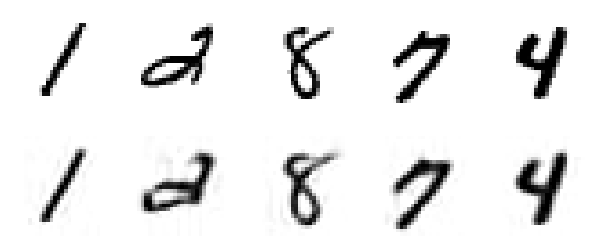

In [ ]:
plot_reconstructions2(recurrent_ae2)
plt.show()

# Discussion

What is an autoencoder?
-> An autoencoder is an articial neural network
  - Used with unsupervised learning
  - Learns efficient representations of input data
    - Uses dimention reduction
(ChatGPT helped me learn)
  - Compiles the encoder and decoder to create a history and codings output

- Here, the first row of images is the origional, and the second row is the reconstructions

##Stacked Autoencoder
- More neurons, more layers
- Use with fraud detection

##Convolutional Autoencoder
- Like a puzzle, looks at small parts of puzzle to understand larger picture
- Use with facial recognition

##Recurrent Autoencoder
- Can process time-series data, data with differing lengths
- Used for text generation, speech recognition
- Representing sequential data (ChatGPT helped)

1. Discuss how effective was auto encoders in generating images:
  - In the fashion dataset, the stacked, convolutional, and recurrent autoencoder results are indistiguishable, but the 'original' data is changed slightly
    - I'd say the convolutional autocoder did best with this data; the images produced seem to be the most detailed and close to the originals.
  - In the digits dataset, again it seems like the bottom row of data changes slightly, but the top row remains practically the same.
    - I would say the recurrent autoencoder did best, since the numbers produced are the most clear

2. Discuss how you can improve the architecture for better image generation:
  - I think the main thing is to choose the appropriate autoencoder for each task.
  - For image generation, it depends on what you want to generate
    - It makes sense that the convolutional autoencoder does best with the fashion dataset, since the convolutional model looks at small parts of the image and learns to apply it to the big picture
    - For the digit dataset, I would think the convolutional would also work better, but maybe because the recurrent is used more with numbers, it works better?
      - We could try more layers, more neurons, but we don't want to overfit the data, so it would depend on what the outputs do.